# Roughness curve model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import genfromtxt
import time

In [34]:
def crater(inc, emi, phase, q, a, f_alpha):
    """Amount of light scattered by the crater.


    Effects of surface roughness on a flat area with a crater.
    A six point gausssian quadrature is used to approximate the
    total amount fo light reflected from the surface.

    The roughness of the surface is simulated by parabolic craters
    that have variable parameters.

    Parameters
    ----------
    inc:
        Incident angle (degree).
    emi:
        Emission angle (degree).
    phase:
        Phase angle (degree).
    q: float
        The depth to radius ratio: ``h / r``
    a: float
        Fraction of radiation singly scattered

    b(lambda) and c(lambda) , the coefficients of the scattering function

    Rhe radius of the crater: r = 25 units
    third implies a 50 x 50 grid for the integration.

    let ``q = h / r``

    assume a scattering law. several forms are:
    * Lambert law: ``I = F * mu_0``

    * Lommel Seeliger law: ``I = F * (mu0 / (mu0 + mu)) * phi(alpha)``
      (our scattering function)

        s(ai,e,alpha) = the amount of light scattered

        b(lambda) = scattering function coefficient
        c(lambda) = scattering function coefficient

        ais = incident angle in crater ( i*)
        es  = emission angle in crater ( e*)

        x = x coordinate in the crater
        y = y coordinate in the crater
        q = h / r

        mu = cos(e)
        mu0 = cos(ai)
        mu_s = cos(es)
        mu0_s = cos(ais)

    ai and e remain constant over the integration
    r remains constant
    x and y are the indexing variables that are also
    the position pointers for the spot on the crater
    all cos, sin and cot functions can be
    calculated beforehand
    all angle mu_st be changed to radians, if they aren't
    already.

    """
    r = 25            # Crater radius
    h = q * r         # Depth of the crater
    r2h = r ** 2 / h

    cos_i, sin_i = np.cos(np.radians(inc)), np.sin(np.radians(inc))
    cos_e, sin_e = np.cos(np.radians(emi)), np.sin(np.radians(emi))

    if sin_e == 0:
        sin_e = 1e-5

    cot_e, cot_i = cos_e / sin_e, cos_i / sin_i

    cos_a = np.clip((np.cos(np.radians(phase)) - cos_i * cos_e) / (sin_i * sin_e), -1, 1)
    sin_a = np.sqrt(1 - cos_a ** 2)

    # (X, Y) value of the center of the crater grid (pixels: -24 to +25)

    st = 0
    for x in np.linspace(-24.5, 24.5, 50):
        for y in np.linspace(-24.5, 24.5, 50):
            # Is the point inside the crater?
            if x ** 2 + y ** 2 > r ** 2:
                continue
            # Is the point seen?
            if (x - r2h * cot_e) ** 2 + y ** 2 < r ** 2:
                continue
            # Is the point illuminated?
            if (x - r2h * cot_i * cos_a) ** 2 + (y - r2h * cot_i * sin_a) ** 2 < r ** 2:
                continue

            # The point has passed all tests. Calculate the scaterred light.
            x1 = x / r2h
            y1 = y / r2h
            c1 = np.sqrt(1 + 4 * (x1 ** 2 + y1 ** 2))

            # Calculate the scattering angles inside the crater
            mu0_s = np.abs((cos_i - 2 * sin_i * (x1 * cos_a + y1 * sin_a)) / c1)
            mu_s  = (cos_e - 2 * x1 * sin_e) / c1

            # st = b*cos(e)  |   b * cos(e) = b0 *(cos(e) * cos(i)) ** ak
            # (For a minnaert function. For your combination function
            # add up all the scattering angles for that function).
            st += (f_alpha * a * (mu0_s / (mu_s + mu0_s)) + (1 - a) * mu0_s)

    return st / 1976  #prob a normalization constant IMP : 1976 from Bonnie's code

In [35]:
#inc = 56.35
phase = 15.6

a = 0.7
f_alpha = 1.2

emi = np.arange(1, 90, 5)

def out(q):
    return [crater(e, e, phase, q, a, f_alpha) for e in emi] #inc is commented


Text(0, 0.5, 'I/F')

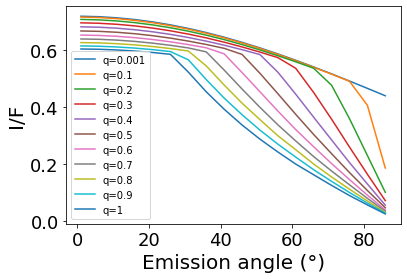

In [36]:
#columns = []
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 


for q in [0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    plt.plot(emi, out(q), label=f'q={q}')

plt.legend();
plt.xlabel('Emission angle (°)', fontsize = 20)
plt.ylabel('I/F', fontsize = 20)

#columns += [emi,out(q)]
                          
#np.savetxt("model.txt", np.column_stack(columns), fmt='%.3e', delimiter="  ")

In [37]:
#f=open('model.txt','a')

for q in [1]:#,0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    np.savetxt(
    'model_11.csv',
    np.transpose([
      emi,
      out(q),
    ]),
    header='emi, model',
    delimiter=', ',
    fmt='%.1f, %.3f',
)

In [38]:
#print(grad[])

Text(0, 0.5, 'I/F')

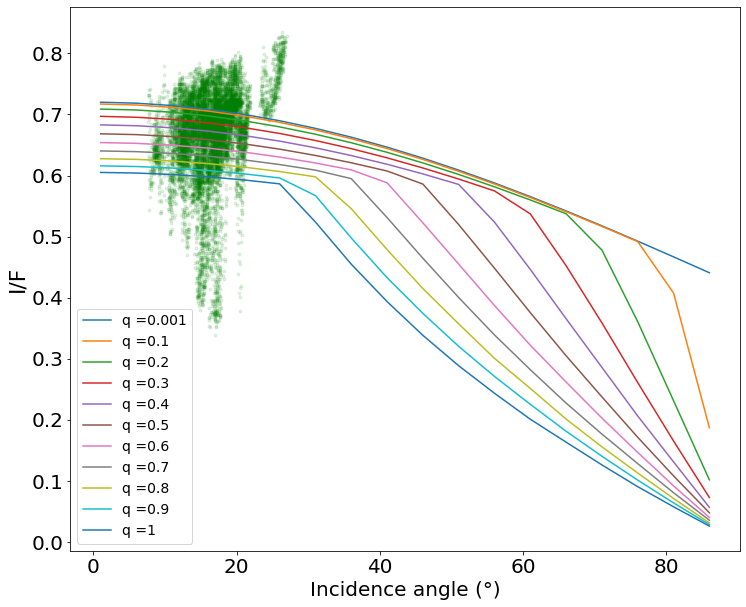

In [40]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

fig, (ax0) = plt.subplots(1, figsize=(12, 10))
#file0 = 'lor_0299148263_0x630_sci-SP.txt'#lor_0299148263_0x630_sci-Pole.txt'
#obs0 = np.genfromtxt(file0,names=['IbyF','inc','emi','phase']) 
#file1 = 'pole_8263_out.txt'
#obs1 = np.genfromtxt(file1,names=['IbyFout','incout','emiout','phaseout']) 




firstinputfiledata = genfromtxt("lor_0299148263_0x630_sci-WB.txt")#lor_0299148263_0x630_sci-pole.txt")#lor_0299148263_0x630_sci-SP.txt")#lor_0299148263_0x630_sci-pole.txt")#"lor_0298992789_0x636_sci-Putative.txt"#lor_0299148263_0x630_sci-WB.txt")#lor_0299148263_0x630_sci-SP.txt")#lor_0298992789_0x636_sci-Putative.txt")#lor_0299148263_0x630_sci-WB.txt")#lor_0298992789_0x636_sci-Putative.txt")#lor_0299148263_0x630_sci-Washboard.txt")#lor_0299148263_0x630_sci-BT.txt")#lor_0298992789_0x636_sci-BT.txt")#lor_0299148263_0x630_sci-BT.txt")#lor_0298992789_0x636_sci-BT.txt")#lor_0299148263_0x630_sci-SP.txt") #lor_0299148263_0x630_sci-BT.txt")
#secondmodelfiledata = genfromtxt("lor_0299148263_0x630_sci-BT.txt")#lor_0299148263_0x630_sci-WB_out.txt")#lor_0298992789_0x636_sci-Putative_out.txt")#lor_0299148263_0x630_sci-Washboard_out.txt")#lor_0299148263_0x630_sci-BT_output.txt")#lor_0299148263_0x630_sci-BT_output.txt")#lor_0298992789_0x636_sci-BT_op.txt")#lor_0299148263_0x630_sci-SP_output.txt")#lor_0299148263_0x630_sci-BT_output.txt"lor_0299148263_0x630_sci-BT_ielt75_inv_output.txt")#lor_0299148263_0x630_sci-BT_ielt75_q0.14theta8.txt")
#thirdmodelfiledata = genfromtxt("lor_0299148263_0x630_sci-BT_ielt75q0.8A41out.txt")#lor_0299148263_0x630_sci-BT_ielt75_q0.14theta8.txt")

#firstinputfiledata = genfromtxt("lor_0299148263_0x630_sci-BTinc.txt")#lor_0299148263_0x630_sci-photoLatSP.txt")#lor_0299148263_0x630_sci-photoLat.txt")#lor_0299148263_0x630_sci-pole.txt")#lor_0299148263_0x630_sci-BT_line.txt")#lor_0299148263_0x630_sci-BT.txt")
#secondmodelfiledata = genfromtxt("lor_0299148263_0x630_sci-BTinc_op.txt")#lor_0299148263_0x630_sci-photoLatSP_op.txt")#lor_0299148263_0x630_sci-photoLat_op.txt")#lor_0299148263_0x630_sci-pole_out.txt")#lor_0299148263_0x630_sci-BT_line_op.txt")#lor_0299148263_0x630_sci-BT_output.txt")



plt.plot(firstinputfiledata[:, 2], firstinputfiledata[:, 0],'.', alpha=0.1, color='green')#, label= f'a={a},f={f_alpha}')#,'Bladed terrain encounter')#'"Bladed Terrain Data")
#plt.plot(secondmodelfiledata[:, 2], secondmodelfiledata[:, 0],'.', alpha=0.25, color = 'red')#,label= f'a={a},f={f_alpha}')# label=f'f={f_alpha}')#"q=0.14, theta =7.97 Model fit f=1.16 A=0.7");
#plt.plot(thirdmodelfiledata[:, 2], thirdmodelfiledata[:, 0],'.', alpha=0.25, label="q=0.86, theta =40.7 Bladed Terrain Model fit f=1.85 A =0.9")


for q in [0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    plt.plot(emi, out(q), label=f'q ={q}')
    
#for q in [0.4]:
#    plt.plot(emi, out(q), label=f'q ={q}')

plt.legend( fontsize = 14);
plt.xlabel('Incidence angle (°)', fontsize=20) #Emission earlier
plt.ylabel('I/F',fontsize=22)

In [24]:
#grad_mod = np.gradient(np.gradient(secondmodelfiledata[:, 2]))#np.gradient(np.gradient(secondmodelfiledata[:, 2]))
grad_input = np.gradient(np.gradient(firstinputfiledata[:, 2]))#np.gradient(np.gradient(firstinputfiledata[:, 2]))
#grad_q = np.gradient(np.gradient(out(q)))

In [12]:
#print(type(grad_q))
#print(out(q))
#print(grad_q)
print(grad_input)
print(emi)

[ 0.0000000e+00  0.0000000e+00 -4.4408921e-16 ... -2.5000000e-02
 -2.5000000e-02  0.0000000e+00]
[ 1  6 11 16 21 26 31 36 41 46 51 56 61 66 71 76 81 86]


In [9]:
print(type(q))

<class 'int'>


In [10]:
np.savetxt(
    'lor_0299148263_0x630_sci-BT.txt-q.csv',
    np.transpose([
      emi,
      out(q),
    ]),
    header='emi, model_out,',
    delimiter=', ',
    fmt='%.1f, %.3f',
)

NameError: name 'secondmodelfiledata' is not defined

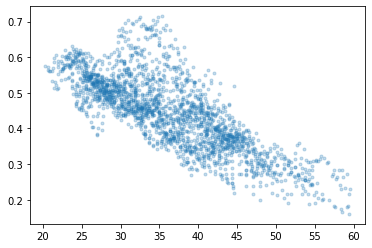

In [11]:
plt.plot(firstinputfiledata[:, 2], firstinputfiledata[:, 0],'.', alpha=0.25, label=f'a={a}')#'"Bladed Terrain Data")
plt.plot(secondmodelfiledata[:, 2], secondmodelfiledata[:, 0],'.',alpha=0.25, label=f'f={f_alpha}')#"q=0.14, theta =7.97 Model fit f=1.16 A=0.7");

In [12]:
plt.plot(grad_input, firstinputfiledata[:, 0],'.',alpha=0.25, label=f'f={f_alpha}')#
plt.plot(grad_mod, secondmodelfiledata[:, 0],'.',alpha=0.25, label=f'f={f_alpha}')#
plt.plot(grad_q)

NameError: name 'grad_input' is not defined

No handles with labels found to put in legend.


Text(0, 0.5, 'I/F')

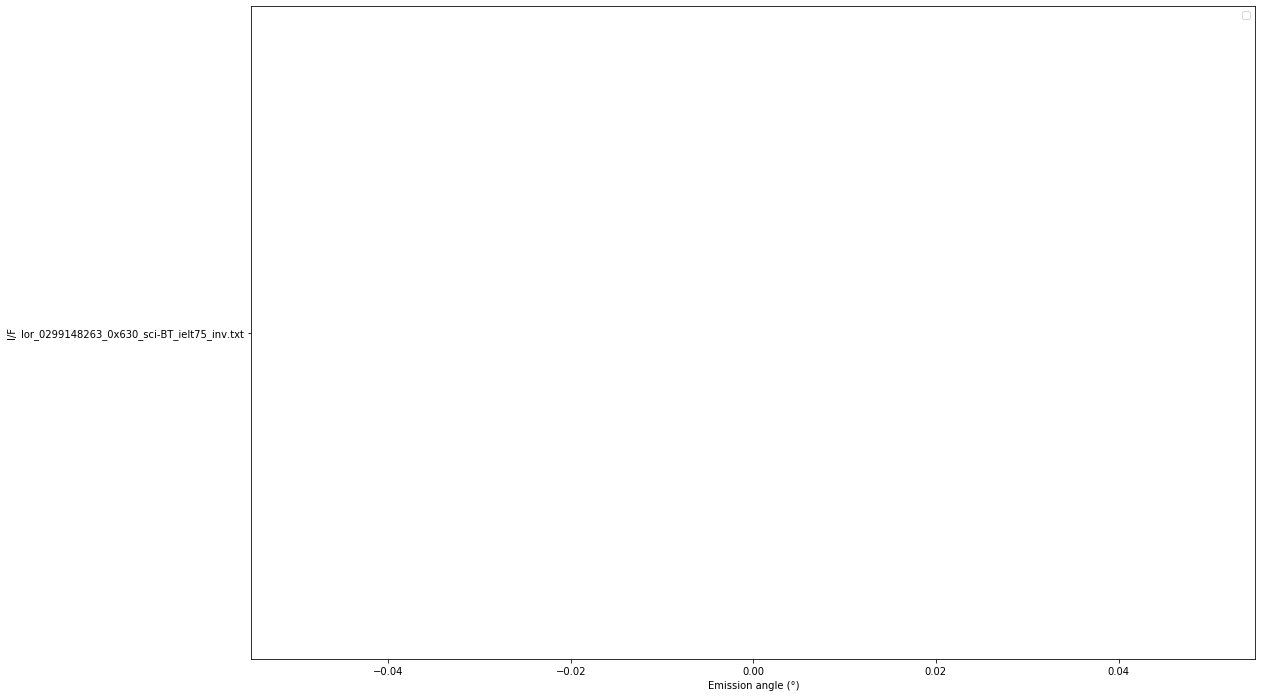

In [29]:
fig, (ax0) = plt.subplots(1, figsize=(18, 12))
file0 = 'lor_0299148263_0x630_sci-BT_ielt75_inv.txt'
obs0 = np.genfromtxt(file0,names=['IbyF','inc','emi','phase']) 
#file1 = 'pole_8263_out.txt'
#obs1 = np.genfromtxt(file1,names=['IbyFout','incout','emiout','phaseout']) 

plt.plot(file0)

#firstfiledata = genfromtxt("lor_0299148263_0x630_sci-BT_ielt75_inv.txt")
#secondfiledata = genfromtxt("lor_0299148263_0x630_sci-bladed_output.txt")

#plt.plot(firstfiledata[:, 1], firstfiledata[:, 0],'.',alpha=0.25, label="lor8263bladed_terrain.txt Data");
#plt.plot(secondfiledata[:, 1], secondfiledata[:, 0],'.', alpha=0.25, label="model.txt Data")

#for q in [0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
#    plt.plot(emi, out(q), label=f'q={q}')

plt.legend();
plt.xlabel('Emission angle (°)')
plt.ylabel('I/F')

In [ ]:

# Main

# Output Variable
st = 0.0

# Inputs
fileName = input("Input data file name: ").strip()

f_alpha = float(input("Input f(alpha): ").strip())
a = float(input("Input A (0-1) scattering law partitioning coef.: ").strip())

# Parsing Input File, casting input columns as seperate numpy arrays [4 are expected]
#pfinst = pf(fileName)
#pfinst.readFile()

#floatArray = pfinst.convertLines2Floats()
#d1, d2, d3, d4 = np.array(floatArray).transpose()

floatArray = np.genfromtxt(fileName, dtype=float, skip_header=1)
[ref, inc, emi, phase] = np.hsplit(floatArray,4)

# Quick Error Test
n = len(ref)
if(n != len(inc) or n != len(emi) or n != len(phase)):
    raise ValueError("The Length of data lists must be equal")

# Main Body
q_min = 0

start = time.time()

err_min = 1.e24
for i2 in range(1, 510, 10):
    q = float(i2)/10.
    err = 0.
    for i in range(n):
        st = crater(inc, emi, phase, q, a, f_alpha) #d2[i], d3[i], q, d4[i], aaa, st, falpha)
        err += (st-inc)*(st-inc)

    if(err < err_min):
        err_min = err
        q_min = q

print(f"First for loop: {time.time()-start}")

q1 = q_min - 0.1
q2 = q_min + 0.1

if(q1 < 0.0):
    q1 = 0.0

start = time.time()

err_min = 1.e24
for i2 in range(1, 11):
    q = float(i2)/10.
    err = 0.

    for i in range(n):
        st = crater(inc, emi, phase, q, a, f_alpha)
        err += (st-d1[i])*(st-d1[i])

    if(err < err_min):
        err_min = err
        q_min = q

print(f"Second for loop: {time.time()-start}")
        
q1 = q_min - 0.04
q2 = q_min + 0.04

if(q1 < 0.0):
    q1 = 0.0

start = time.time()

err_min = 1.e24
for i2 in range(1, 11):
    q = q1 + (q2-q1)*float(i2)/10.
    err = 0.

    for i in range(n):
        st = crater(inc, emi, phase, q, a, f_alpha)#(d2[i], d3[i], q, d4[i], aaa, st, falpha)
        err += (st-d1[i])*(st-d1[i])

    if(err < err_min):
        err_min = err
        q_min = q

print(f"Third for loop: {time.time()-start}")

theta = 57.296*np.arctan(q_min)
print(f"Best fit 'q' = {q_min} and theta_bar = {theta}")
